In [1]:
import torch
import numpy as np

In [2]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [3]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [4]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [5]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# 또는 TensorDataset을 사용합니다.
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [6]:
torch.manual_seed(1)
data_loader = DataLoader(joint_dataset, batch_size=2, shuffle=True)


In [11]:
for i , batch in enumerate(data_loader,1):
    print(f'배치 {i}:', 'x:', batch[0], 
          '\n       y:', batch[1])

배치 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
       y: tensor([1, 3])
배치 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
       y: tensor([2, 0])


In [47]:
import torch
import numpy as np
import matplotlib.pyplot as plt

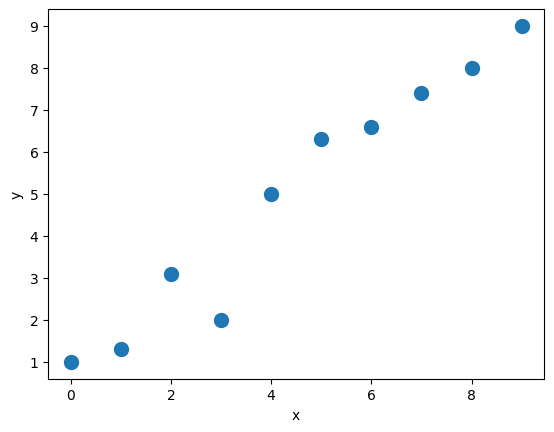

In [48]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

In [49]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# 일부 컴퓨터에서는 .float()로 명시적으로 타입을 변환해야 합니다.
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [50]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_() # 가중치 텐서에 대한 기울기를 저장합니다.
bias = torch.zeros(1, requires_grad=True) # 편향을 0으로 초기화하고 기울기를 저장합니다.

def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'에포크 {epoch}  손실 {loss.item():.4f}') # item()을 사용하여 스칼라 값을 가져옵니다.

에포크 0  손실 45.0782
에포크 10  손실 26.4366
에포크 20  손실 1.5918
에포크 30  손실 14.1307
에포크 40  손실 11.6038
에포크 50  손실 6.3084
에포크 60  손실 0.6349
에포크 70  손실 3.1374
에포크 80  손실 1.9999
에포크 90  손실 0.3133
에포크 100  손실 0.7653
에포크 110  손실 1.0039
에포크 120  손실 0.0235
에포크 130  손실 0.5176
에포크 140  손실 0.0759
에포크 150  손실 1.8789
에포크 160  손실 0.0008
에포크 170  손실 0.0866
에포크 180  손실 0.0646
에포크 190  손실 0.0011


In [51]:
print(f'최종 가중치: {weight.item():.4f}, 최종 편향: {bias.item():.4f}')

최종 가중치: 2.6696, 최종 편향: 4.8797


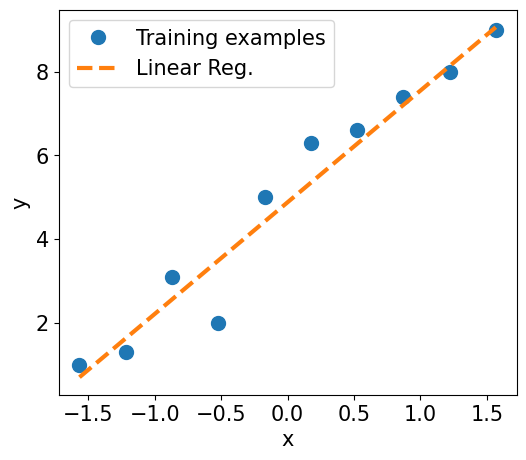

In [52]:
# X_test에도 동일한 표준화를 적용한다 

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()  # 계산 그래프에서 텐서를 분리합니다.


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('figures/12_08.pdf')

plt.show()

torch.nn 모듈은 여러 가지 손실 함수를 제공하며 torch.optim 모듈은 계산된 그레디언트를 기반으로 파라미터를 업데이트하는데 가장 널리 사용되는 최적화 알고리즘을 지원한다

In [53]:
import torch.nn as nn # 여러가지 손실함수를 제공한다
import torch.optim as optim # 여러가지 최적화 알고리즘을 제공한다
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer= optim.SGD(model.parameters(), learning_rate)

In [54]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 예측을 생성
        pred = model(x_batch)
        # 손실을 계산
        loss = loss_fn(pred, y_batch)
        # 그래디언트를 계산
        loss.backward()
        # 그래디언트를 사용하여 파라미터를 업데이트
        optimizer.step()
        # 그래디언트를 0으로 재설정
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'에포크 {epoch}  손실 {loss.item():.4f}')

c:\Users\82108\miniconda3\envs\deeplearning\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


에포크 0  손실 24.6684
에포크 10  손실 29.1377
에포크 20  손실 20.9207
에포크 30  손실 0.1257
에포크 40  손실 12.4922
에포크 50  손실 1.7845
에포크 60  손실 7.6425
에포크 70  손실 2.5606
에포크 80  손실 0.0157
에포크 90  손실 0.7548
에포크 100  손실 0.8412
에포크 110  손실 0.4923
에포크 120  손실 0.0823
에포크 130  손실 0.0794
에포크 140  손실 0.0891
에포크 150  손실 0.0973
에포크 160  손실 0.1043
에포크 170  손실 0.1103
에포크 180  손실 0.0009
에포크 190  손실 0.0764


In [55]:
print('최종 파라미터:', model.weight.item(), model.bias.item())

최종 파라미터: 2.6496422290802 4.87706995010376


In [80]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [81]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

In [68]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

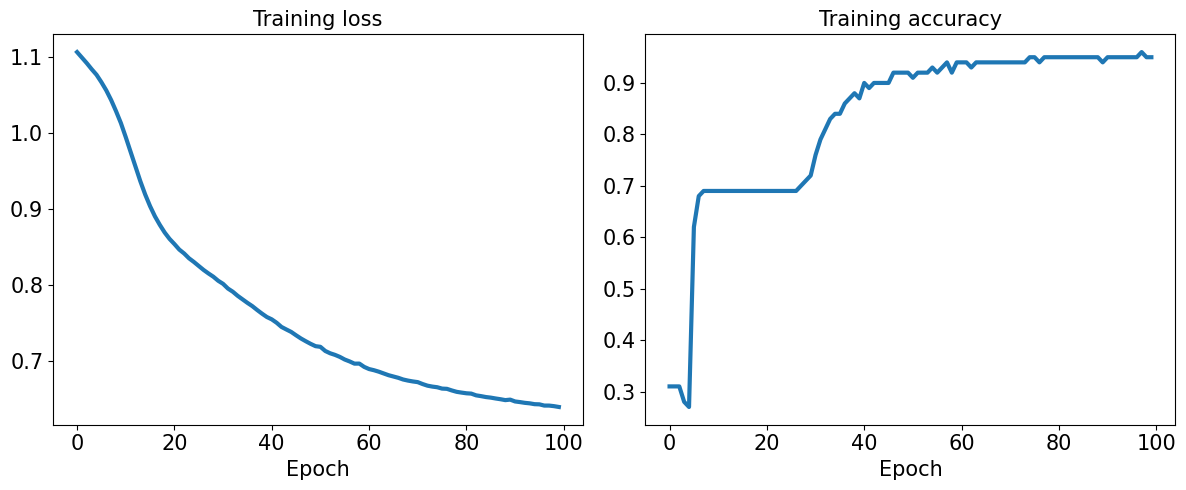

In [82]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

In [83]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도: {accuracy.item():.4f}')

테스트 정확도: 0.9800


In [84]:
# 훈련된 모델 저장하기
path = 'iris_classifier.pt'
torch.save(model, path )

In [85]:
# 훈련된 모델 로드하기
model_new = torch.load(path)

In [86]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [87]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'테스트 정확도: {accuracy.item():.4f}')

테스트 정확도: 0.9800


In [88]:
# 파라미터만 저장시에는
path = 'iris_classifier_state_dict.pt'
torch.save(model.state_dict(), path)

In [89]:
# 파라미터를 로드하려면 먼저 이전처럼 모델을 구성하고 그 다음 로드한 파라미터를 모델에 주입한다
model_new=  Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

In [90]:
torch.tanh(torch.tensor([1.0, 0.5, 0.0, -0.5, -1.0]))

tensor([ 0.7616,  0.4621,  0.0000, -0.4621, -0.7616])

In [91]:
z = np.arange(-5,5,0.005)
print(z)

[-5.    -4.995 -4.99  ...  4.985  4.99   4.995]
